In [47]:
import numpy as np


def kmeans_numpy(X, n_clusters, max_iters=100):

    """
    Hint:
    if implementing using numpy array:
    the shape of the centroids are (n_clusters x 2 ), a 2D array--> each cluster is has a coordinate with makes it a 2 value
    The shape of the labels are (for the given sample image) 512 x 512 = 262144 --> a 1D array
    """
    # Initialize cluster centroids randomly
    centroids = X[np.random.choice(len(X), n_clusters, replace=False)]
    dist = np.zeros(n_clusters)
    for _ in range(max_iters):
        # for i in range (len(X)):
        #     # Calculate the distance from each point to each centroid
        #     ###########
        #     for j in range(n_clusters):
        #         dist[j] = np.linalg.norm(X[i]-centroids[j])
        #     ###########
        #   # Assign each point to the nearest cluster
        #     ###########
        #     cluster = np.argmin(dist)
        #     ###########
        #   # Create an empty array to store the new centroids
        #     labels[i] = cluster

        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

         # Assign each point to the nearest cluster
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.zeros((n_clusters, X.shape[1]))

        # Loop through each cluster
        for i in range(n_clusters):
            # Find all data points that belong to the current cluster
            cluster_points = X[labels == i]
            # Calculate the mean (average) of all data points in the cluster
            cluster_mean = np.mean(cluster_points)
            # Assign the cluster mean as the new centroid
            new_centroids[i] = cluster_mean

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
    return centroids, labels

In [48]:
def create_compressed_image(labels, centroids, height, width, channels):
    """
    Hint:
    Assign the cluster value to the pixel of that cluster
    """
    # Step 3: Create a compressed image based on cluster centroids
    compressed_image = np.zeros((height, width, channels), dtype=np.uint8)

    labels = labels.reshape(height, width)

    # Create a compressed image using NumPy indexing
    compressed_image = centroids[labels]

    return compressed_image

512 512 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original image size: 521129 bytes
Compressed image size: 301519 bytes
Compression ratio: 1.73


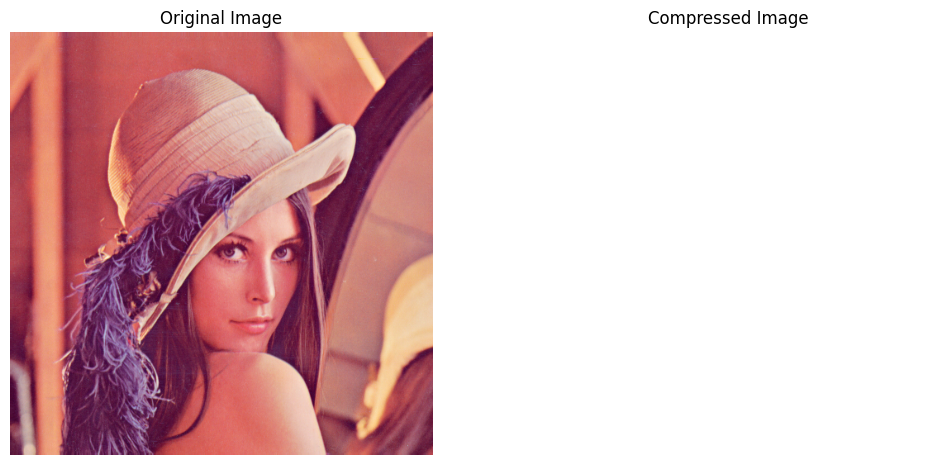

In [49]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_image_compression(image_path, num_clusters):
    # Step 1: Load the image
    original_image = cv2.imread(image_path)

    # Convert the image to RGB color space (if it's not already)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Get the dimensions of the image
    height, width, channels = original_image.shape

    print(height,width,channels)
    # Step 2: Apply K-means clustering using numpy
    pixel_values = original_image.reshape(-1, 3)
    centroids, labels = kmeans_numpy(pixel_values, num_clusters)

    # Step 3: Create a compressed image based on cluster centroids
    compressed_image = create_compressed_image(labels, centroids, height, width, channels)

    # Step 4: Save the compressed image
    compressed_image_path = "compressed_image.png"
    cv2.imwrite(compressed_image_path, cv2.cvtColor(np.float32(compressed_image), cv2.COLOR_RGB2BGR))

    # Save the original image in the same format as the compressed one
    original_image_path = "original_image.png"
    cv2.imwrite(original_image_path, cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))

    # Calculate and print the compression ratio
    original_size = os.path.getsize(original_image_path)
    compressed_size = os.path.getsize(compressed_image_path)
    compression_ratio = original_size / compressed_size

    print(f"Original image size: {original_size} bytes")
    print(f"Compressed image size: {compressed_size} bytes")
    print(f"Compression ratio: {compression_ratio:.2f}")

    # Show the original and compressed images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image)
    plt.title("Compressed Image")
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    image_path = "test_image.png"

    num_clusters = 20  # Adjust the number of clusters as needed
    kmeans_image_compression(image_path, num_clusters)
